# Country Happiness Score Assessment 
## By Chad Goldberg
I created this particular dataset to compare with a similarly structured dataset comprised of values from 2015, while mine uses values from 2017. The original dataset was used to analyze the relationship between foreign investment and the happiness of the countries being invested in. Overall, the majority of this project was spent exploring and learning how to merge data from different sources with some exploratory data analysis sprinkled in throughout. Though I feel more confident now in my ability to locate, import, and merge data, there are still many areas that I need to work in in the future to make myself a more effective data scientist. 

In [483]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [484]:
!pip install geopandas
!pip install descartes

In [485]:
# import preliminary dataset and display first 5 rows
happiness = pd.read_csv("happiness.csv")
happiness.head()

,country,score,investment,population
0,Afghanistan,3.632,5.339000e+07,35530081.0
1,Albania,4.586,1.022132e+09,2873457.0
2,Algeria,5.295,NaN,NaN
3,Angola,3.795,-7.397295e+09,29784193.0
4,Argentina,6.388,1.151686e+10,44271041.0


,country,score,investment,population
22,Burundi,2.905,3.164734e+05,1.086424e+07
26,Central African Republic,3.083,1.717934e+07,4.659080e+06
128,South Sudan,3.254,1.420000e+06,1.257571e+07
137,Tanzania,3.303,1.180210e+09,5.731002e+07
153,Yemen,3.355,-2.698500e+08,2.825042e+07
117,Rwanda,3.408,2.934131e+08,1.220841e+07
134,Syria,3.462,NaN,1.826987e+07
78,Liberia,3.495,2.478430e+08,4.731906e+06
53,Haiti,3.582,3.748550e+08,1.098123e+07
84,Malawi,3.587,2.771122e+08,1.862210e+07


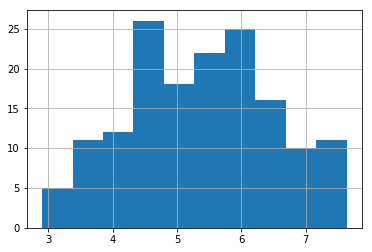

In [486]:
# a simple histogram to see if i can visualize something
happiness.score.hist()
happiness.sort_values(by='score', ascending=True)

## The above histogram is fairly interesting because it shows that the largest score bucket is that with happiness ratings between 4.5 & 5 (roughly 25). Additionally, there are only 13 countries with happiness scores over 7, and luckily only 8 with scores 3.5 or lower. The sorted printed data additionally helps us confirm and view those countries with the lowest and highest scores, showing only 1 below 3 (Burundi), and Finland being the highest on the list. 

In [487]:
# basic statistics in pandas
happiness.score.describe()

count    156.000000
mean       5.375878
std        1.119507
min        2.905000
25%        4.453750
50%        5.378000
75%        6.168500
max        7.632000
Name: score, dtype: float64

## Though not incredibly useful for my purposes, these basic statistics describing the happiness scores offer insights into mean happiness score for the world as will as specific values for min & max again. 

,country,score,investment,population
12,Belgium,6.927,-3.948228e+10,1.137207e+07
56,Hungary,5.620,-1.348354e+10,9.781127e+06
3,Angola,3.795,-7.397295e+09,2.978419e+07
57,Iceland,7.495,-7.016885e+09,3.412840e+05
61,Iraq,4.456,-5.032400e+09,3.827462e+07
62,Ireland,6.977,-3.435981e+09,4.813608e+06
149,Uruguay,6.379,-8.783163e+08,3.456750e+06
140,Trinidad & Tobago,6.192,-4.223901e+08,1.369125e+06
153,Yemen,3.355,-2.698500e+08,2.825042e+07
73,Kyrgyzstan,5.131,-1.072128e+08,6.201500e+06


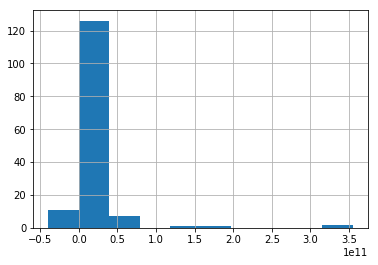

In [488]:
happiness.investment.hist()
happiness.sort_values(by='investment', ascending=True)

## Similarly, I sorted the dataset by foreign direct investment (least to greatest). Foreign direct investment (FDI), in this context, is described as net inflows coming into a country from all outside (foreign) sources. Clearly there is missing data, as evidenced by the NaN values towards the end, but the dataset leads to some interesting questions when looking at other values. For example, it's curious to me that the Netherlands have the second largest foreign direct investment of all countries in the world. Further research suggests that this number is accurate, citing a competitive tax structure as well as liberal policy towards foreign investment. It's also interesting to note that there are only 12 countries with negative FDI, an indication the capital outflow, or divestment, exceeds the country's inflow. It was an initial hypothesis that countries with higher FDIs would have higher happiness scores, though that doesn't necessarily seem to be the case as Iceland, one of the happiest countries, has one of the lowest FDI values and there are multiple countries with high FDIs that have happiness scores below 6 (India,China,Russia). 

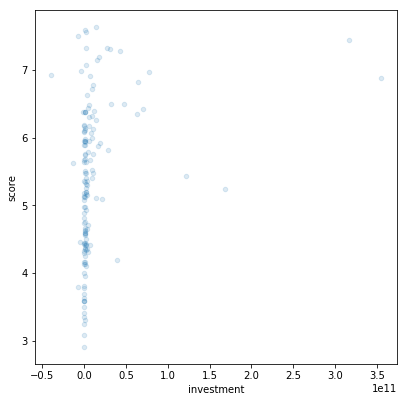

In [489]:
# scatterplot 
f, ax = plt.subplots(figsize=(6.5, 6.5))
happiness.plot.scatter('investment', 'score', alpha=0.15,ax=ax)

## The above is another attempt to view a correlation between happiness score and FDI, though the resulting scatterplot does not seem to suggest any obvious relationship. 

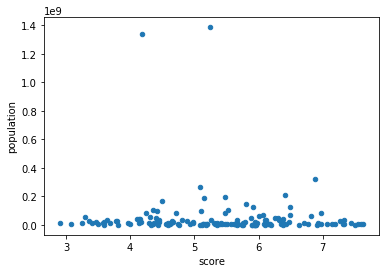

In [490]:
# scatterplot...potentially good because it doesn't necessarily correlate population with happiness score
happiness.plot.scatter('score', 'population')

## I then wanted to look into the relationship between population and happiness score, having no real idea as to whether there would be one or not. Again, the scatterplot does not necessarily indicate a correlation between happiness score and country population. 

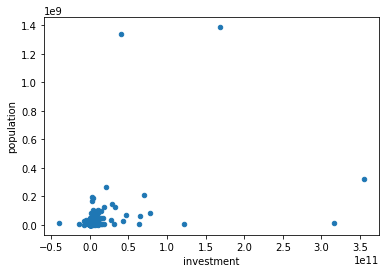

In [491]:
# scatterplot...no real relationship between population & investment
happiness.plot.scatter('investment', 'population')

## A scatterplot assessing the relationship between FDI and population shows the potential for a slight positive correlation, though I ran across some issues when trying to actually calculate correlation. I tried using np.corrcoef(happiness.investment, happiness.population) but the results came back as NaN for each results. Given more time, I would work to actually calculate it. 

# Importing & Merging New Data
## The following section begins by importing a new dataset that contains a list of countries with accompanying scores for Political Rights (PR) and Civil Liberties (CL). 

In [492]:
# import secondary dataset /political rights scores/ and display first 5 rows to see if it worked
political_rights = pd.read_csv("prscores.csv")
political_rights.head()

,country,PR,CL,Status,w,x,y,z
0,Afghanistan,6,6,NF,NaN,NaN,NaN,NaN
1,Albania,3,3,PF,NaN,NaN,NaN,NaN
2,Algeria,6,5,NF,NaN,NaN,NaN,NaN
3,Andorra,1,1,F,NaN,NaN,NaN,NaN
4,Angola,6,6,NF,NaN,NaN,NaN,NaN


## The import seemed to work but there are additional columns (w,x,y,z) that are unncessary. I ended up saving that problem until later so that I could focus on merging this new dataset with the old. 

In [493]:
#  merge happiness dataset with new political rights dataset
merged = pd.merge(happiness, political_rights, on='country')
merged.head()

,country,score,investment,population,PR,CL,Status,w,x,y,z
0,Afghanistan,3.632,5.339000e+07,35530081.0,6,6,NF,NaN,NaN,NaN,NaN
1,Albania,4.586,1.022132e+09,2873457.0,3,3,PF,NaN,NaN,NaN,NaN
2,Algeria,5.295,NaN,NaN,6,5,NF,NaN,NaN,NaN,NaN
3,Angola,3.795,-7.397295e+09,29784193.0,6,6,NF,NaN,NaN,NaN,NaN
4,Argentina,6.388,1.151686e+10,44271041.0,2,2,F,NaN,NaN,NaN,NaN


## With a seemingly good merge, I print the whole list to get an idea of the whole dataset and see what's potentially missing or still out of place. 

In [494]:
print(merged)

                      country  score    investment    population PR CL Status  \
0                 Afghanistan  3.632  5.339000e+07  3.553008e+07  6  6     NF   
1                     Albania  4.586  1.022132e+09  2.873457e+06  3  3     PF   
2                     Algeria  5.295           NaN           NaN  6  5     NF   
3                      Angola  3.795 -7.397295e+09  2.978419e+07  6  6     NF   
4                   Argentina  6.388  1.151686e+10  4.427104e+07  2  2      F   
5                     Armenia  4.321  2.497594e+08  2.930450e+06  5  4     PF   
6                   Australia  7.272  4.257972e+10  2.459893e+07  1  1      F   
7                     Austria  7.139  1.560801e+10  8.809212e+06  1  1      F   
8                  Azerbaijan  5.201  2.867487e+09  9.862429e+06  7  6     NF   
9                     Bahrain  6.105  5.188830e+08  1.492584e+06  7  6     NF   
10                 Bangladesh  4.500  2.151371e+09  1.646698e+08  4  4     PF   
11                    Belaru

## Dropping the extra columns ended up being simple with the following code: 

In [495]:
# trying to figure out how to drop the unfilled columns
merged.drop(["w","x","y","z"],axis=1, inplace=True)
print(merged)
#update: successfully dropped unnamed columns

                      country  score    investment    population PR CL Status
0                 Afghanistan  3.632  5.339000e+07  3.553008e+07  6  6     NF
1                     Albania  4.586  1.022132e+09  2.873457e+06  3  3     PF
2                     Algeria  5.295           NaN           NaN  6  5     NF
3                      Angola  3.795 -7.397295e+09  2.978419e+07  6  6     NF
4                   Argentina  6.388  1.151686e+10  4.427104e+07  2  2      F
5                     Armenia  4.321  2.497594e+08  2.930450e+06  5  4     PF
6                   Australia  7.272  4.257972e+10  2.459893e+07  1  1      F
7                     Austria  7.139  1.560801e+10  8.809212e+06  1  1      F
8                  Azerbaijan  5.201  2.867487e+09  9.862429e+06  7  6     NF
9                     Bahrain  6.105  5.188830e+08  1.492584e+06  7  6     NF
10                 Bangladesh  4.500  2.151371e+09  1.646698e+08  4  4     PF
11                    Belarus  5.483  1.276300e+09  9.507875e+06

## I then wanted to see if I could visualize some of the new data with the old so I took to more EDA:

In [496]:
#merged.plot.scatter('score','PR')
type(merged.PR)

pandas.core.series.Series

## I first tried to do a scatterplot of happiness scores vs PR, though I ran into an interesting issue. 
## I was presented with the following "ValueError: scatter requires x column to be numeric", so I checked
## to see what datatype PR was and it was listed as a series, so I went through the steps to convert it
# to a numeric using the following code. 

In [497]:
s = pd.Series(merged.PR)
>>> pd.to_numeric(s)

0      6
1      3
2      6
3      6
4      2
5      5
6      1
7      1
8      7
9      7
10     4
11     7
12     1
13     1
14     2
15     3
16     3
17     3
18     2
19     2
20     4
21     7
22     6
23     6
24     1
25     7
26     7
27     1
28     7
29     3
      ..
118    7
119    2
120    2
121    7
122    1
123    3
124    7
125    1
126    1
127    7
128    7
129    3
130    6
131    4
132    2
133    1
134    4
135    7
136    6
137    3
138    6
139    1
140    1
141    1
142    7
143    6
144    7
145    7
146    4
147    5
Name: PR, Length: 148, dtype: int64

## I assumed it would be fine so I tried it again but got the same error. I then tried to convert it again to a "float64" just to make sure 

In [498]:
s.astype('float64')

0      6.0
1      3.0
2      6.0
3      6.0
4      2.0
5      5.0
6      1.0
7      1.0
8      7.0
9      7.0
10     4.0
11     7.0
12     1.0
13     1.0
14     2.0
15     3.0
16     3.0
17     3.0
18     2.0
19     2.0
20     4.0
21     7.0
22     6.0
23     6.0
24     1.0
25     7.0
26     7.0
27     1.0
28     7.0
29     3.0
      ... 
118    7.0
119    2.0
120    2.0
121    7.0
122    1.0
123    3.0
124    7.0
125    1.0
126    1.0
127    7.0
128    7.0
129    3.0
130    6.0
131    4.0
132    2.0
133    1.0
134    4.0
135    7.0
136    6.0
137    3.0
138    6.0
139    1.0
140    1.0
141    1.0
142    7.0
143    6.0
144    7.0
145    7.0
146    4.0
147    5.0
Name: PR, Length: 148, dtype: float64

## Again I got the same error. I then looked it up online and the problem seems to be unresolved amongst many users so I figured I could do without visualizing that relationship. 

## Because of that failed visualization I wanted to import more data. I ended up going with data that shows the "average annual hours worked per person per country" as I figured this would be interesting to compare with the other variables and I assumed potential relationship between hrs worked, happiness,and foreign investment. Unfortunately the dataset only accounted for OECD countries so there are only 38 datapoints which will obviously provide for limited analysis. 

In [499]:
# import  dataset /avg annual hrs worked/ and display first 5 rows
hrsworked = pd.read_csv("hrsworked.csv")
hrsworked.head()

,country,hrs
0,Australia,"1,676"
1,Austria,"1,511"
2,Belgium,"1,545"
3,Canada,"1,695"
4,Chile,"1,954"


In [500]:
# merge hrsworked dataset with current dataset to be able to compare all countries that have data on avg annual hrs worked
merged2 = pd.merge(merged, hrsworked, on='country')
merged2.head()

,country,score,investment,population,PR,CL,Status,hrs
0,Australia,7.272,4.257972e+10,24598933.0,1,1,F,"1,676"
1,Austria,7.139,1.560801e+10,8809212.0,1,1,F,"1,511"
2,Belgium,6.927,-3.948228e+10,11372068.0,1,1,F,"1,545"
3,Canada,7.328,2.752563e+10,36708083.0,1,1,F,"1,695"
4,Chile,6.476,6.418583e+09,18054726.0,1,1,F,"1,954"


## Import and merge went well so I now wanted to sort (ascending) based on hrs. 

In [501]:
# want to sort top and bottom 5 avg annual work hour countries
merged2.sort_values(by=['hrs'])

,country,score,investment,population,PR,CL,Status,hrs
32,Turkey,5.483,1.088600e+10,80745020.0,4,5,PF,..
10,France,6.489,4.733562e+10,67118648.0,1,2,F,..
11,Germany,6.965,7.798339e+10,82695000.0,1,1,F,"1,356"
7,Denmark,7.555,2.357373e+09,5769603.0,1,1,F,"1,408"
25,Norway,7.594,1.642539e+09,5282223.0,1,1,F,"1,419"
23,Netherlands,7.441,3.165410e+11,17132854.0,1,1,F,"1,433"
30,Sweden,7.314,3.153084e+10,10067744.0,1,1,F,"1,470"
1,Austria,7.139,1.560801e+10,8809212.0,1,1,F,"1,511"
21,Luxembourg,6.910,6.622737e+09,599449.0,1,1,F,"1,518"
33,United Kingdom,6.814,6.468540e+10,66022273.0,1,1,F,"1,543"


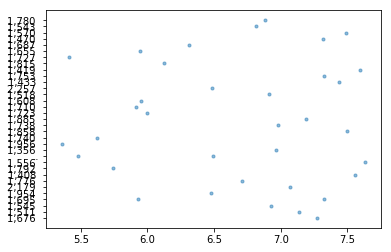

In [502]:
#merged2.plot.scatter('investment', 'hrs')

area = np.pi*3
plt.scatter(merged2.score, merged2.hrs, s=area, alpha=0.5)

## As expected, the relationship between hrs worked and happiness score does not necessarily show a correlation and seems somewhat random. With more time and resources I would like to know the average hrs worked from people in other countries as I feel that may tell a different story based on the fact that Most OECD members are high-income economies with a very high Human Development Index (HDI) and are regarded as developed countries.It would be interesting to compare lower income economies.

## That prompted the idea of importing new data that shows country GDP. The following code is my importing of the new datafram followed by a merge with my initial merged dataset. 

In [503]:
# import  dataset /GDP per capita/ and display first 5 rows
GDP = pd.read_csv("GDP.csv")
GDP.head()

,country,GDP
0,Aruba,25655.102020
1,Afghanistan,550.068459
2,Angola,4100.289786
3,Albania,4537.579056
4,Andorra,39146.548840


In [504]:
merged3 = pd.merge(merged, GDP, on='country')
merged3.head()

,country,score,investment,population,PR,CL,Status,GDP
0,Afghanistan,3.632,5.339000e+07,35530081.0,6,6,NF,550.068459
1,Albania,4.586,1.022132e+09,2873457.0,3,3,PF,4537.579056
2,Algeria,5.295,NaN,NaN,6,5,NF,4055.247211
3,Angola,3.795,-7.397295e+09,29784193.0,6,6,NF,4100.289786
4,Argentina,6.388,1.151686e+10,44271041.0,2,2,F,14398.358770


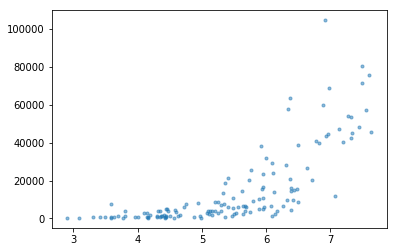

In [505]:
area = np.pi*3
plt.scatter(merged3.score, merged3.GDP, s=area, alpha=0.5)

## The above scatterplot is pretty interesting, as it shows a fairly clear relationship (seemingly exponential) between happiness score and GDP. 

# Attempts At Making Choropleth Maps
## The following section outlines my ambitions to use geopandas and geographic data to be able to visually assess the countries and their data from a world view.
## To start, I read in a publicly available dataset that has country/region names with the accompanying geometry necessary to draw the areas on the map. 

In [506]:
# reading in 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#world.plot()
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997033076265 49.21498078062912,..."
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819135928291 41.30864166926936,..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,(POLYGON ((141.0002104025918 -2.60015105551566...
8,260580739,Asia,Indonesia,IDN,3028000.0,(POLYGON ((141.0002104025918 -2.60015105551566...
9,44293293,South America,Argentina,ARG,879400.0,(POLYGON ((-68.63401022758323 -52.636370458874...


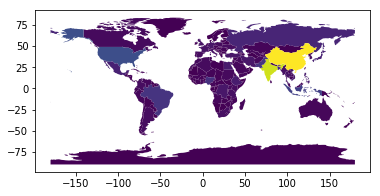

In [507]:
# In anticipation of a merge, I changed the "name" column to "country" so I can merge new dataset with the old on country
world.columns = ['pop_est','continent','country','iso_a3','gdp_md_est','geometry']
world.plot(column='pop_est')

## I was luckily able to plot a sample with the given 'pop_est' data the came with the public dataset. Next I needed to merge with my old data. I decided to do a right merge so that I would keep all of the extra countries that did not match with my old dataset. Given more time, the next order of business would be to properly clean the data and make a dataframe with all the relevant and matching countries. 

In [508]:
# merge new country geometry data with initial dataframe
merged4 = pd.merge(merged, world, on='country', how='right') 

In [510]:
#displays the type of dataframe
type(merged4), type(world)

(pandas.core.frame.DataFrame, geopandas.geodataframe.GeoDataFrame)

In [511]:
crs = {'init': 'epsg:4326'}
merged4_gdf = gpd.GeoDataFrame(merged4, crs=crs, geometry=merged4.geometry)

## I ran into trouble plotting the map after I merged but after some exploring I found that the merged dataset was no longer a GeoDataFrame, but a regular dataframe. The above code changed the merged4 accordingly. I then wanted to plot a visual of world happiness scores. 

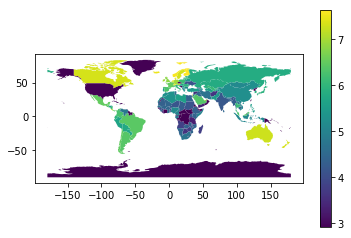

In [512]:
fig, ax = plt.subplots(1, 1)
merged4_gdf.plot('score', ax=ax, legend=True)

## This ended up working fairly well, though some obvious problems arose. It seems as though some of the data is corrupted as there seems to be too many places where the scores are 3.5 or lower, and clearly the United States is not one of them. Again, I would need to go through and thoroughly clean the new merged data and figure out how to properly account for the desired variables. 

## There are some positives, however, as one can clearly confirm some of the happiest countries are those in Scandinavia. 

# Conclusion
## Overall, I'd say the most interesting find was that there seemed to be an exponential relationship between GDP and happiness score. The data suggests that GDP increases as country happiness scores increase.

## I also feel with more time and practice I could create some pretty good looking geographic visuals, though I clearly would need more practice with data cleaning. I'm a bit frustrated at the problem that arose with some of the coding that I couldn't figure out, so there was some visualization left to be desired and some analysis that I could not do. I feel there are many more variables that I could potentially look at with regards to countries around the world but the hardest part in synthesizing it all would be to match each country correctly with corresponding data. 

# Data Sheet Information
## Happiness Investment Datasheet
## Owner: Chad Goldberg
## Motivation for Dataset Creation 

## Why was the dataset created? (e.g., were there specific tasks in mind, or a specific gap that needed to be filled?) 

## I created this particular dataset to compare with a similarly structured dataset comprised of values from 2015, while mine uses values from 2017. The original dataset was used to analyze the relationship between foreign investment and the happiness of the countries being invested in. I intend to compare these results and map changes over the years.

## What (other) tasks could the dataset be used for? Are there obvious tasks for which it should not be used? 

## Though this dataset may be used in conjunction with many other values for numerous tasks, the values I chose to use only make sense for my particular narrative. 

## I have included in this dataset a few instances (political rights, civil liberties) that one may use for additional tasks, however I did not utilize them in my analyses and included them merely to replicate the previous dataset construction as closely as possible. 

## Has the dataset been used for any tasks already? If so, where are the results so others can compare (e.g., links to published papers)? 

## This particular dataset has not been used, though the same variables were used to create a dataset based on 2015 values.  (https://www.kaggle.com/andreyka2/happiness-and-investment)

## Who funded the creation of the dataset? If there is an associated grant, provide the grant number. 

## There was no funding for the creation of this dataset as it is being used strictly for practice in an applied data science course at Tufts University. 

## Any other comments? 

## Dataset Composition
## What are the instances? (that is, examples; e.g., documents, images, people, countries) Are there multiple types of instances? (e.g., movies, users, ratings; people, interactions between them; nodes, edges) 

## Instances include multiple values for: ‘country’, ‘happiness score’, ‘happiness rank’, ‘foreign investment’ (in US dollars), ‘population’, ‘political rights’, ‘civil liberties’

## Are relationships between instances made explicit in the data (e.g., social network links, user/movie ratings, etc.)? 

## Our data displays each country as it relates to the accompanying values and is fairly intuitive to understand.

## How many instances of each type are there? 
 
## The unmerged and unclean data has the following number of instances for each type:

## 	‘country’: 156
## 	‘happiness score’: 156 (scores ranging from 2.905-7.632)
## 	‘happiness rank’: 156 (ranks 1-156)
## 	‘foreign investment’: 243 
## 	‘population’: 262
## 	‘political rights’: 195 (scores ranging from 1-7)
## 	‘civil liberties’: 195 (scores ranging from 1-7)
## 	‘hrs’
## 	‘GDP’

## The final merged and cleaned data will accommodate the lowest number of instances so as to avoid large amounts of missing data, which would come from choosing the largest number.  In this case, we intend our dataset to have 156 instances for each type. 

## What data does each instance consist of? “Raw” data (e.g., unprocessed text or images)? Features/attributes? Is there a label/target associated with instances? If the instances are related to people, are subpopulations identified (e.g., by age, gender, etc.) and what is their distribution? 

## Raw data of the instances include scores based on survey responses (‘happiness score’, ‘political rights’, ‘civil liberties’) and cumulative values from the International Monetary Fund (‘foreign investment’). 


## Is everything included or does the data rely on external resources? (e.g., websites, tweets, datasets) If external resources, a) are there guarantees that they will exist, and remain constant, over time; b) is there an official archival version. Are there licenses, fees or rights associated with any of the data? 

## The data relies on the following external collection sources:

## 	For ‘happiness score’ & ‘happiness rank’:
## 	http://worldhappiness.report/ed/2018/

## 	For ‘foreign investment’:
## 	https://data.worldbank.org/indicator/BX.KLT.DINV.CD.WD?end=2017&start=2017
	
## 	For ‘population’:
## 	https://data.worldbank.org/indicator/sp.pop.totl

## 	For ‘political rights’ & ‘civil liberties’:
## 	https://freedomhouse.org/report/fiw-2017-table-country-scores
	
## 	For ‘average work hours’
## https://stats.oecd.org/Index.aspx?DataSetCode=ANHRS

## For ‘GDP per capita’
## https://data.worldbank.org/indicator/ny.gdp.pcap.cd

## Though there is no guarantee that the data will exist in the future or remain constant, the data is currently drawn from sources that try to maintain and update the values annually. 

## Are there recommended data splits or evaluation measures? (e.g., training, development, testing; accuracy/AUC) 

## There are no recommended data splits or evaluation measures. 

## What experiments were initially run on this dataset? 
## Have a summary of those results and, if available, provide the link to a paper with more information here. 

## There were no experiments initially run on this dataset.

## Any other comments? 

## Data Collection Process
## How was the data collected? (e.g., hardware apparatus/sensor, manual human curation, software pro- gram, software interface/API; how were these con- structs/measures/methods validated?) 

## The data was collected from three main public sources: World Happiness report, World Bank, and Freedom House (links to the sources were previously referenced). After downloading the relevant data files from each source and isolating values for 2017, I manually consolidated values for each instance into one excel spreadsheet. 

## Who was involved in the data collection process? (e.g., students, crowdworkers) How were they compensated? (e.g., how much were crowdworkers paid?) 

## I was solely involved in the data collection process and was not compensated, as the project is for learning purposes and academic in nature. 

## Over what time-frame was the data collected? Does the collection time-frame match the creation time-frame? 

## The data collection and creation time-frames were equal in nature, each spanning a period of roughly two days. 

## How was the data associated with each instance acquired? Was the data directly observable (e.g., raw text, movie ratings), reported by subjects (e.g., survey responses), or indirectly inferred/derived from other data (e.g., part of speech tags; model-based guesses for age or language)? If the latter two, were they validated/verified and if so how? 

## Not all the data was directly observable, as much was the result of pooled values stemming from previous analysis (‘happiness score’, ‘foreign investment’, ‘civil liberties’, ‘political liberties’). 

## Does the dataset contain all possible instances? Or is it, for instance, a sample (not necessarily random) from a larger set of instances? 

## This dataset merely contains samples from larger sets of instances. I simply pulled desired instances and values from the sources referenced above. 

## If the dataset is a sample, then what is the population? 
## What was the sampling strategy (e.g., deterministic, probabilistic with specific sampling probabilities)? Is the sample representative of the larger set (e.g., geographic coverage)? If not, why not (e.g., to cover a more diverse range of in- stances)? How does this affect possible uses? 

## Though this dataset is a combined sample larger datasets, the instance (country) acts as the factor that relates all other instances. That is, all the datasets I pulled from were utilizing data representative of my main population.  

## Is there information missing from the dataset and why? 
(this does not include intentionally dropped instances; it might include, e.g., redacted text, withheld documents) Is this data missing because it was unavailable? 

## There are missing values in each individual instance but it Is unclear as to why. The missing values seem to be sporadic in nature and the original datasets offer no reason for empty cells. 

## Are there any known errors, sources of noise, or redundancies in the data? 

## I have not noticed any such cases. 

## Any other comments? 

## n/a
## Data Preprocessing
## What preprocessing/cleaning was done? (e.g., discretization or bucketing, tokenization, part-of-speech tagging, SIFT feature extraction, removal of instances, processing of missing values, etc.) 

## Some of the country names were different across each set of files (for example, Laos and Lao PDR, South Korea and Republic of Korea) so I had to manually change each different value. Additionally, I had to ensure that missing values were removed.

## Was the “raw” data saved in addition to the preprocessed/cleaned data? (e.g., to support unanticipated future uses) 

## Yes, I saved each individual “raw” data file as separate original entities and have saved my data at multiple stages to support future uses as well as enable the ability to start fresh from certain processing points. 

## Is the preprocessing software available? 

## No it is not. 

## Does this dataset collection/processing procedure achieve the motivation for creating the dataset stated in the first section of this datasheet? 

## While I am closer to achieving the motivation for creating the dataset, I am still in early stages of processing and analysis. I will feel more excited and accomplished once I begin to visualize the data. 

## Any other comments? 
## Dataset Distribution
## How is the dataset distributed? (e.g., website, API, etc.; does the data have a DOI; is it archived redundantly?) 

## The dataset will be published on the owner’s GitHub account.  

## When will the dataset be released/first distributed? (Is there a canonical paper/reference for this dataset?) 

## The dataset will be released in the coming months, at the completion of visualization and analysis. 

## What license (if any) is it distributed under? Are there any copyrights on the data? 

## There are no copyrights on the data. 

## Are there any fees or access/export restrictions? Any other comments? 

## There are no fees or restrictions. 

## Any other comments?

## Dataset Maintenance
## Who is supporting/hosting/maintaining the dataset? 
## How does one contact the owner/curator/manager of the dataset (e.g. email address, or other contact info)? 

## The owner may be contacted at the following email address: chad.goldberg@tufts.edu

## Will the dataset be updated? How often and by whom? How will updates/revisions be documented and communicated (e.g., mailing list, GitHub)? Is there an erratum? 

## I do not anticipate updating the dataset as this intends to be a one-time academic assignment.

## If the dataset becomes obsolete how will this be communicated? 

## There will be no way of communicating this other than through replication or similar analysis. However, because this dataset represents reported values from 2017, it represents a mere snapshot of the particular instances associated with that year. For that reason, I do not see the data set becoming “obsolete” in the traditional sense, as may be utilized when comparing future replications or similar analysis.

## Is there a repository to link to any/all papers/systems that use this dataset? 

## There will eventually be a link to the owner’s GitHub account. 

## If others want to extend/augment/build on this dataset, is there a mechanism for them to do so? If so, is there a process for tracking/assessing the quality of those contributions. What is the process for communicating/distributing these contributions to users? 

## The dataset will be available to download as a .csv file so any and all augmentations will be individual to each new use case. Similarly, communication or distribution of said contributions will be on an individual basis as well. 

## Any other comments? 

## Legal and Ethical Considerations
## If the dataset relates to people (e.g., their attributes) or was generated by people, were they informed about the data collection? (e.g., datasets that collect writing, photos, interactions, transactions, etc.) 
## This does not apply to my dataset. 
## If it relates to other ethically protected subjects, have appropriate obligations been met? (e.g., medical data might include information collected from animals) 
## This does not apply to my dataset. 
## If it relates to people, were there any ethical review applications/reviews/approvals? (e.g. Institutional Review Board applications) 
## This does not apply to my dataset. 
## If it relates to people, were they told what the dataset would be used for and did they consent? What community norms exist for data collected from human communications? If consent was obtained, how? Were the people provided with any mechanism to revoke their consent in the future or for certain uses? 
## This does not apply to my dataset. 
## If it relates to people, could this dataset expose people to harm or legal action? (e.g., financial social or otherwise) What was done to mitigate or reduce the potential for harm? 
## This does not apply to my dataset. 
## If it relates to people, does it unfairly advantage or dis- advantage a particular social group? In what ways? How was this mitigated? 
## This does not apply to my dataset. 
## If it relates to people, were they provided with privacy guarantees? If so, what guarantees and how are these ensured? 
## This does not apply to my dataset. 
## Does the dataset comply with the EU General Data Protection Regulation (GDPR)? Does it comply with any other standards, such as the US Equal Employment Opportunity Act? 
## Yes, as far as I know. The data is collected from trusted associations or government initiatives that are known to comply with GDPR.
## Does the dataset contain information that might be considered sensitive or confidential? (e.g., personally identifying information) 
## No it does not. 
## Does the dataset contain information that might be considered inappropriate or offensive? 

## No it does not. 
